In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt
from sklearn.metrics import mean_squared_error

C:\Users\ACE-Desktop\anaconda3\envs\freshnew\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [3]:
# Load data
df = pd.read_csv('data\data.csv', parse_dates=['day'], index_col='day')
df.head()

,Unnamed: 0,item_number,item_name,purchase_price,suggested_retail_price,orders_quantity,sales_quantity,revenue
day,,,,,,,,
2022-02-09,0,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
2022-02-09,1,80317483,ROMA TOMATEN ES I 500G SF,0.92,1.49,0.0,16.0,23.55
2022-02-09,2,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
2022-02-09,3,80101923,SL MANDARINEN BEH.ES I 750G GS,2.05,3.49,0.0,3.0,10.47
2022-02-09,4,80028349,UH ZWIEBELN DE-HE I 1KG GS,0.64,0.99,0.0,13.0,12.84


In [4]:
# Drop unnamed column
data = df.drop('Unnamed: 0', axis=1)

# Drop duplicated rows
data = data.drop_duplicates()
data.head()

# Set the time index right
data = data.iloc[::-1]


# Missing values in revenue indicate either missing data in sales, or maybe no sales at all.

In [5]:
# Obtain Items names and codes
names = data.item_name.unique()
ids = data.item_number.unique()

In [6]:
# Separate the 3 products
p1 = data[data['item_number']==ids[0]]
p2 = data[data['item_number']==ids[1]]
p3 = data[data['item_number']==ids[2]]

In [7]:
# Split test and train

split = 0.9
p1_train = p1.iloc[:int(len(p1.index) *split),:]
p1_test = p1.iloc[int(len(p1.index) *split):,:]
p2_train = p2.iloc[:int(len(p2.index) *split),:]
p2_test = p2.iloc[int(len(p2.index) *split):,:]
p3_train = p3.iloc[:int(len(p3.index) *split),:]
p3_test = p3.iloc[int(len(p3.index) *split):,:]

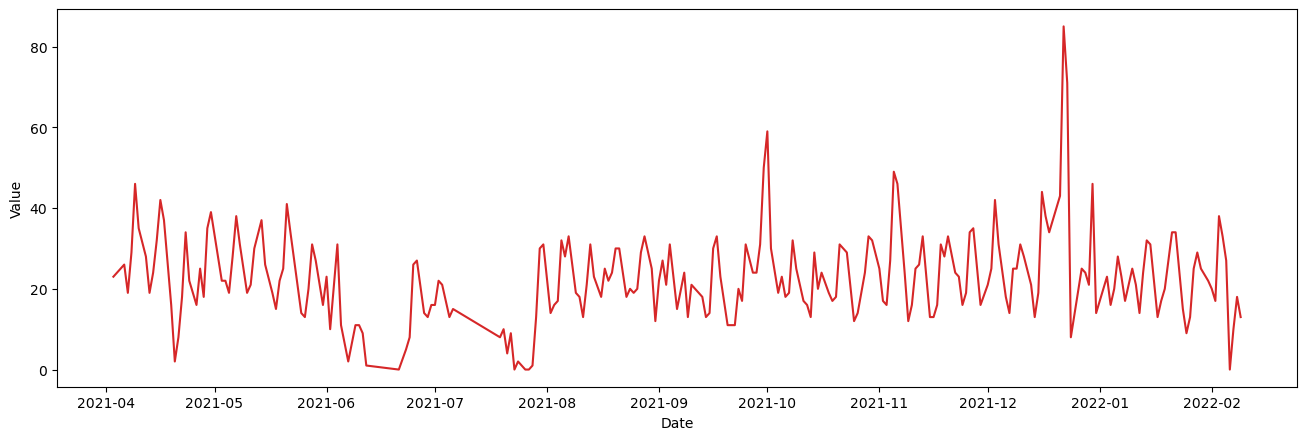

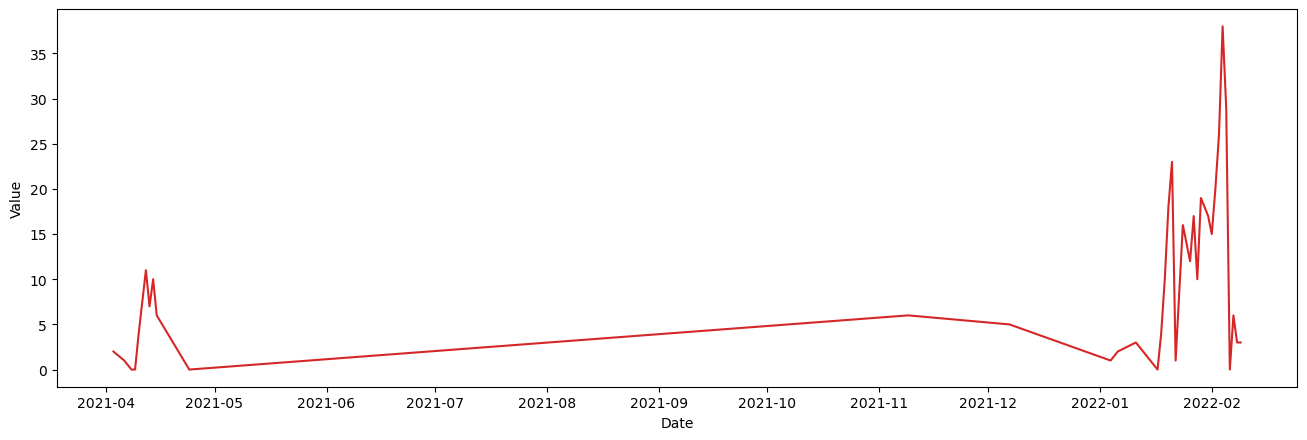

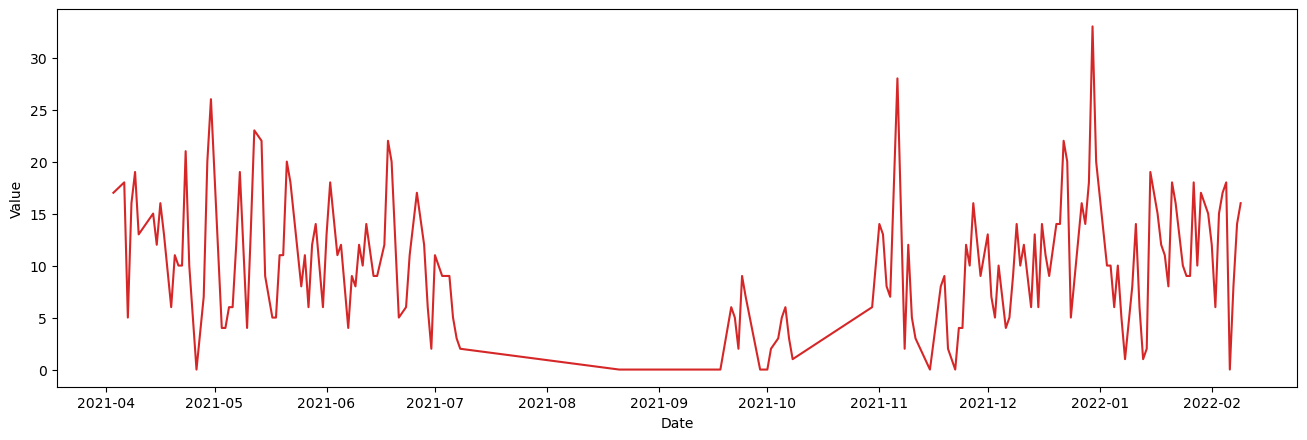

In [8]:
# Look at the sales quantity for each item
plot_df(p1, x=p1.index, y=p1.sales_quantity)
plot_df(p1, x=p2.index, y=p2.sales_quantity)
plot_df(p1, x=p3.index, y=p3.sales_quantity)

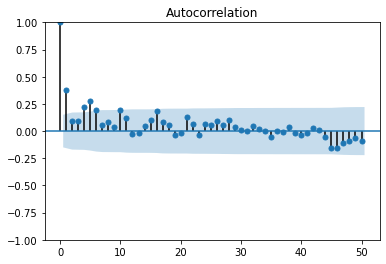

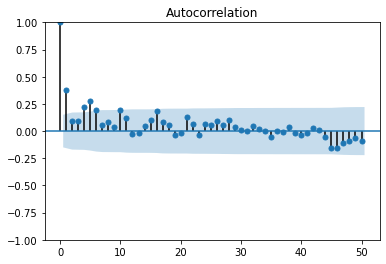

In [9]:
# Look at ACF for seasonality
plot_acf(p3.sales_quantity, lags = 50)

Calling the auto_arima_forecast function implemented in a separate file:

In [10]:
from train import auto_arima_forecast
model, forecast, test = auto_arima_forecast(p1, 'sales_quantity', 0.9)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1588.563, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1645.764, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1646.099, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1636.595, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1643.767, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1589.716, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1587.236, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1629.934, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1588.259, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1609.558, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1584.444, Time=0.22 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1579.152, Time=0.19 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1578.116, Time=0.20 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : 

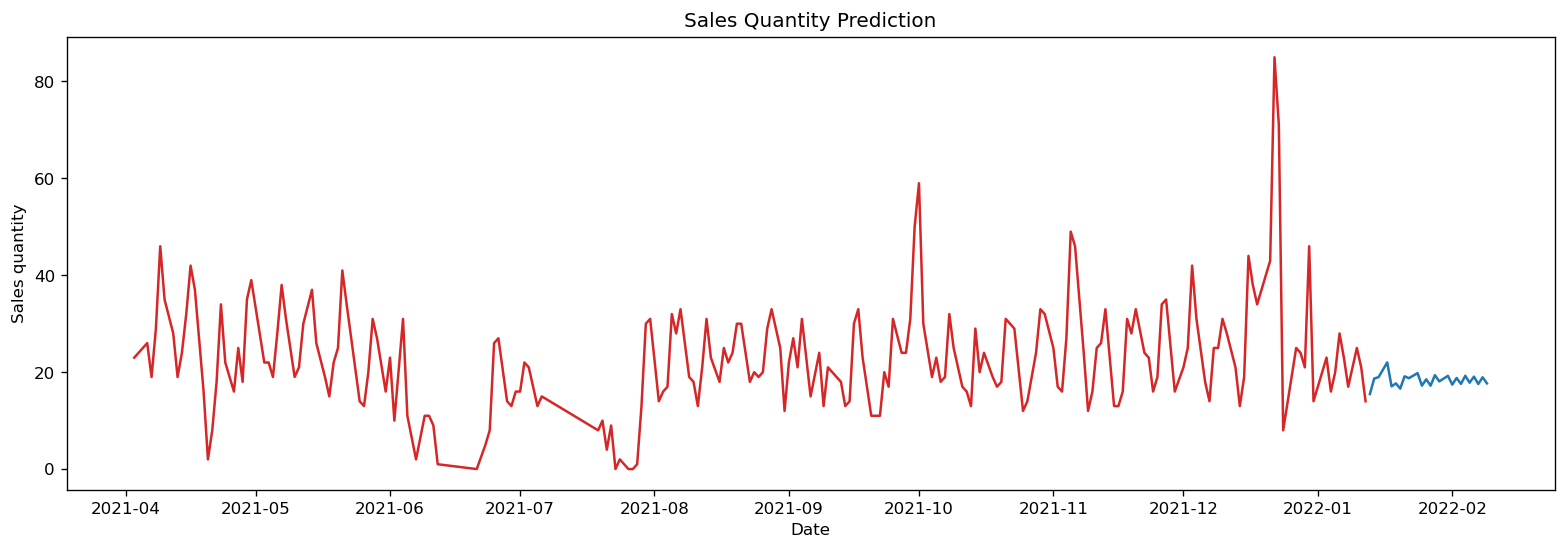

In [11]:
# Plot it
plt.figure(figsize=(16,5), dpi=120)
plt.plot(p1_train.index, p1_train.sales_quantity, color='tab:red')
plt.plot(p1_test.index, forecast.prediction, color='tab:blue')
plt.gca().set(title='Sales Quantity Prediction', xlabel='Date', ylabel="Sales quantity")
plt.show()

In [17]:
# Give a measure of performance
rms = sqrt(mean_squared_error(test.sales_quantity,forecast.prediction))
print("RMSE: ", rms)

RMSE:  10.031730216298161
